In [2]:
# Common
import os 
import keras 
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import clear_output as cls

# Data 
from keras.preprocessing.image import ImageDataGenerator as IDG

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px

# Model
from keras.models import Sequential, load_model
from keras.layers import Dense
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay
from tensorflow.keras.optimizers import Adam

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
train_path = "C:/Users/nagasundar chokkakul/OneDrive/Desktop/DL-CNN PROJECTS/Training Data"

In [4]:
test_path = "C:/Users/nagasundar chokkakul/OneDrive/Desktop/DL-CNN PROJECTS/Prediction Data"

In [7]:
class_names = sorted(os.listdir(train_path))
n_classes = len(class_names)

# Show
print(f"Num Classes : {n_classes}")
print(f"Class Names : {class_names}")

Num Classes : 10
Class Names : ['Bald Uakari', 'Emperor Tamarin', 'Golden Monkey', 'Gray Langur', 'Hamadryas Baboon', 'Mandril', 'Proboscis Monkey', 'Red Howler', 'Vervet Monkey', 'White Faced Saki']


In [8]:
# Calculate Class Distribution 
class_dis = [len(os.listdir(train_path + f"/{name}")) for name in class_names]
# Pie Plot
fig = px.pie(names=class_names, values=class_dis, hole=0.4, title="Training Class Distribution")
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Bar Plot
fig = px.bar(x=class_names, y=class_dis, color=class_names)
fig.show()

ploting the class distribution

In [9]:
# Calculate Class Distribution 
class_dis = [len(os.listdir(test_path + f"/{name}")) for name in class_names]

# Pie Plot
fig = px.pie(names=class_names, values=class_dis, hole=0.4, title="testing Class Distribution")
fig.update_layout({'title':{'x':0.45}})
fig.show()

# Bar Plot
fig = px.bar(x=class_names, y=class_dis, color=class_names)
fig.show()

In [10]:
# Initialize Generator
train_gen = IDG(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    validation_split=0.1,
)


test_gen = IDG(rescale=1./255,)

In [27]:
type(train_ds)

keras.preprocessing.image.DirectoryIterator

In [15]:
# Load Data
BATCH_SIZE = 32
train_ds = train_gen.flow_from_directory(train_path, subset='training', target_size=(224,224), shuffle=True, class_mode='binary', batch_size=BATCH_SIZE)
valid_ds = train_gen.flow_from_directory(train_path, subset='validation', target_size=(224,224), shuffle=True, class_mode='binary', batch_size=BATCH_SIZE)
test_ds = test_gen.flow_from_directory(test_path, target_size=(224,224), shuffle=True, class_mode='binary', batch_size=BATCH_SIZE)

Found 9000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1306 images belonging to 10 classes.


In [16]:
def show_images(data, model=None, GRID=[5,6], SIZE=(25,25)):
    
    # Plot Configurations
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    plt.figure(figsize=SIZE)
    
    i = 1
    for images, labels in iter(data):
        
        # Select Random Data
        
        id = np.random.randint(len(images))
        image, label = tf.expand_dims(images[id], axis=0), class_names[int(labels[id])]
        
        # Make Prediction
        if model is not None:
            pred = class_names[np.argmax(model.predict(image))]
            title = f"True : {label}\nPred : {pred}"
        else:
            title = f"{label}"
        
        # Show Data
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image[0])
        plt.axis('off')
        plt.title(title)
        
        # Break Loop Once Done
        i+=1
        if i>n_images:
            break
        cls()
    plt.show()

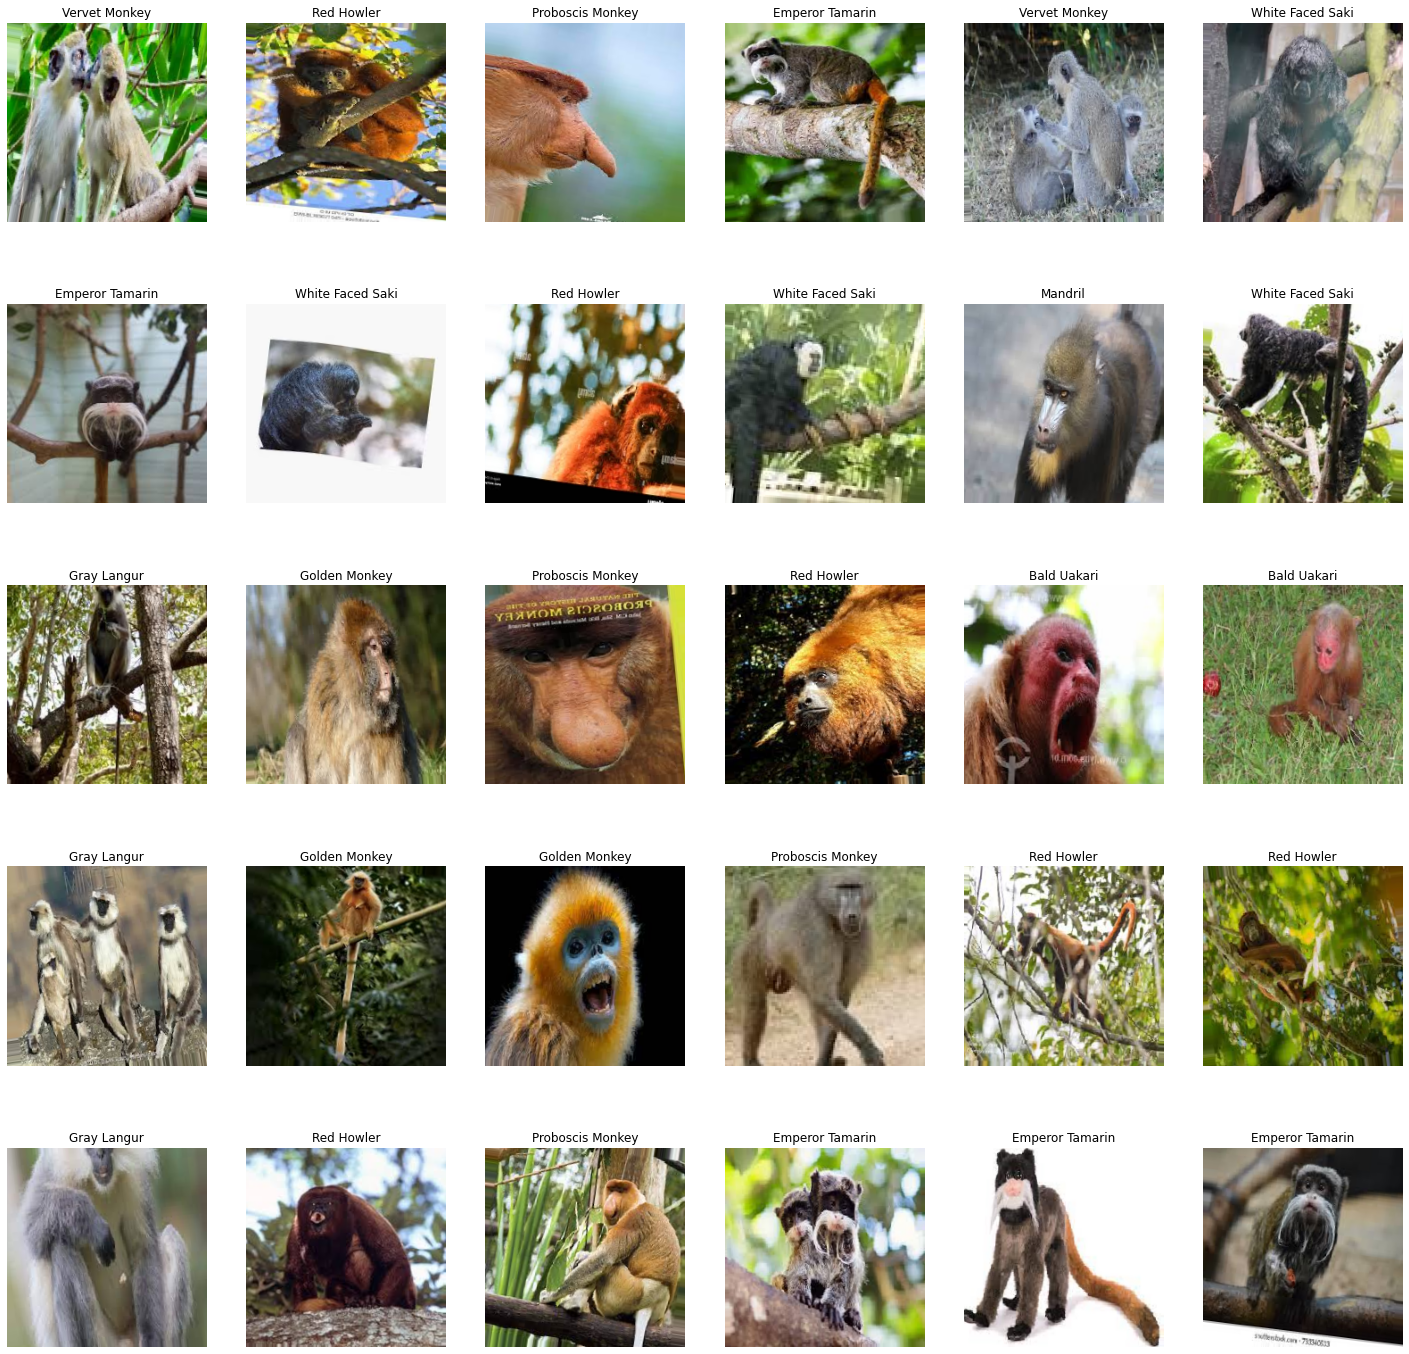

In [17]:
show_images(data = train_ds)

cnn -model

In [18]:
model = Sequential()

In [19]:
##conv 2d layer
model.add(tf.keras.layers.Conv2D(filters =32 ,padding ='same' , kernel_size =3 , activation = 'relu' ,input_shape =[256,256,3]))

##max pooling layer

model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))

##conv2d layer

model.add(tf.keras.layers.Conv2D(filters =32 ,padding = "same",kernel_size =3 ,activation ='relu',))

##max pooling layer 
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))

## faltten layer
model.add(tf.keras.layers.Flatten())

##fully connected layer

model.add(tf.keras.layers.Dense(units =128 , activation = 'relu'))

model.add(tf.keras.layers.Dense(units =10 ,activation ='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [21]:
model.compile ( loss ='sparse_categorical_crossentropy',optimizer = 'adam' ,
                 metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="Accuracy")])

In [24]:
history = model.fit_generator(train_ds ,valid_ds
      steps_per_epoch=15,
      epochs=epochs,
      validation_data = (train_ds,valid_ds)
      batch_size = 128,
      verbose=1)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4246227945.py, line 1)

In [26]:
history = model.fit_generator(
      train_ds,
      steps_per_epoch=150,
      epochs=10,
      validation_data = valid_ds,
      batch_size = 128,
      verbose=1)

TypeError: Model.fit_generator() got an unexpected keyword argument 'batch_size'

In [32]:
batch_size = 128
num_epoch = 10
#model training
history = model.fit(x =train_ds,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data= valid_ds)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/flatten/Reshape' defined at (most recent call last):
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\nagasundar chokkakul\AppData\Local\Temp\ipykernel_12612\2657888733.py", line 1, in <cell line: 1>
      history = model.fit(train_ds, validation_data=valid_ds, epochs=10)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\nagasundar chokkakul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\reshaping\flatten.py", line 104, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential/flatten/Reshape'
Input to reshape is a tensor with 3211264 values, but the requested shape requires a multiple of 131072
	 [[{{node sequential/flatten/Reshape}}]] [Op:__inference_train_function_1423]

In [29]:
! pip install openpyxl

     -------------------------------------- 242.1/242.1 kB 3.7 MB/s eta 0:00:00
